In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [2]:
%config InlineBackend.figure_format = 'svg'

# Basic EDA

In [30]:
# All subtasks using the same text data
train_df_1 = pd.read_csv("../dev_phase/subtask1/train/eng.csv")
train_df_2 = pd.read_csv("../dev_phase/subtask2/train/eng.csv")
train_df_3 = pd.read_csv("../dev_phase/subtask3/train/eng.csv")
dev_df = pd.read_csv("../dev_phase/subtask1/dev/eng.csv")

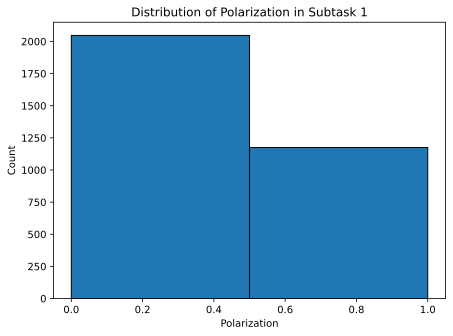

Number of polarized: polarization
0    2047
1    1175
Name: count, dtype: int64
Number of non-polarized: polarization
0    2047
1    1175
Name: count, dtype: int64


In [32]:
plt.hist(train_df_1["polarization"], bins=len(train_df_1["polarization"].unique()), edgecolor='black')
plt.title("Distribution of Polarization in Subtask 1")
plt.xlabel("Polarization")
plt.ylabel("Count")
plt.tight_layout()
# save as pdf in figures
plt.savefig("figures/eng/subtask1_polarization_distribution.pdf")
plt.show()
print(f"Number of polarized: {train_df_1['polarization'].value_counts()}")
print(f"Number of non-polarized: {train_df_1['polarization'].value_counts()}")

In [35]:
1512 / (1512 + 1869)

0.4472049689440994

# Subtask 2

In [24]:
# 1. Number of 1s in 'political'
num_political_ones = train_df_2['political'].sum()
print("Number of 1s in political:", num_political_ones)

# 2. Number of 1s in everything else (all other columns except 'id', 'text', 'political')
label_columns = [col for col in train_df_2.columns if col not in ['id', 'text', 'political']]
num_other_ones = train_df_2[label_columns].sum().sum()
print("Number of 1s in everything else (excluding 'political'):", num_other_ones)


Number of 1s in political: 1150
Number of 1s in everything else (excluding 'political'): 591


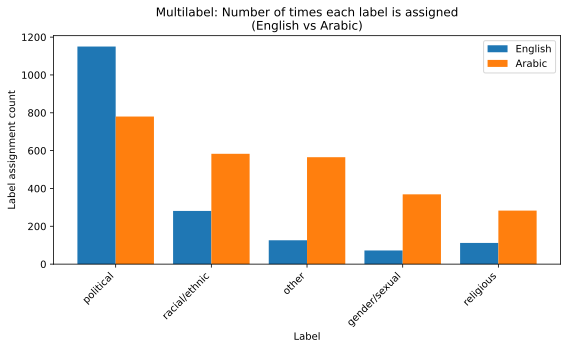

In [ ]:
# Multilabel context: Each instance can belong to multiple labels,
# so we count the number of times each label is assigned (sum of '1's for each label).

import os

# Ensure figure directory exists
os.makedirs("figures/eng", exist_ok=True)

# List of label columns (assuming the schema is id, text, then multilabel columns)
label_cols = train_df_2_eng.columns[2:]

# For multilabel data, sum each label independently (number of '1's)
label_counts_eng = train_df_2_eng[label_cols].sum()
label_counts_arb = train_df_2_arb[label_cols].sum()

# Sort labels by combined count (total number of times each label appears in either lang)
total_label_counts = label_counts_eng + label_counts_arb
sorted_labels = total_label_counts.sort_values(ascending=False).index.tolist()

# Arrange label count Series in sorted order for both languages
label_counts_eng_sorted = label_counts_eng[sorted_labels]
label_counts_arb_sorted = label_counts_arb[sorted_labels]

df_label_counts_multilabel = pd.DataFrame({
    "English": label_counts_eng_sorted,
    "Arabic": label_counts_arb_sorted
})

# Plot: Stacked bar chart shows label prevalence under multilabel context
df_label_counts_multilabel.plot(kind='bar', figsize=(8, 5), width=0.8)
plt.title("Multilabel: Number of times each label is assigned\n(English vs Arabic)")
plt.ylabel("Label assignment count")
plt.xlabel("Label")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("figures/eng/subtask2_label_distribution_eng_arb.pdf")
plt.show()


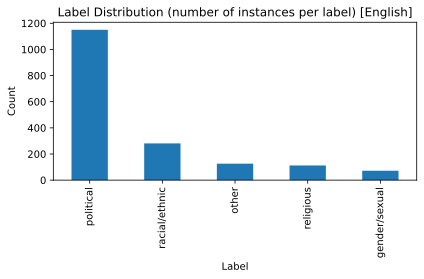

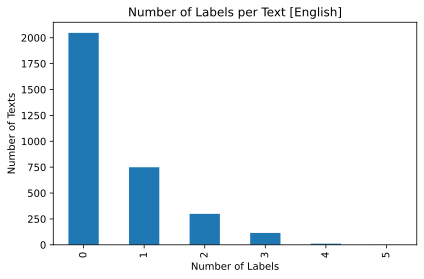

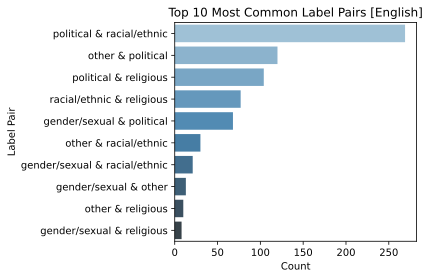

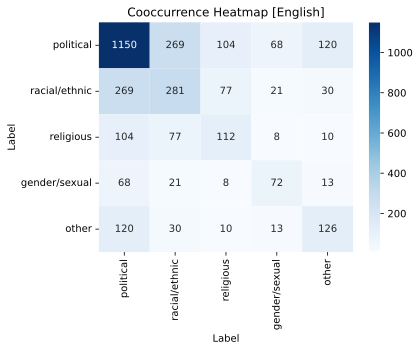

In [21]:
import itertools
import seaborn as sns
import os

# Ensure directory exists
os.makedirs("figures/eng", exist_ok=True)

# List of label columns
label_cols = train_df_2.columns[2:]

# Prepare data for plotting
label_counts = train_df_2[label_cols].sum().sort_values(ascending=False)

num_labels_per_text = train_df_2[label_cols].sum(axis=1)
num_labels_value_counts = num_labels_per_text.value_counts().sort_index()

pair_counts = {}
for labels in train_df_2[label_cols].values:
    active = [label_cols[i] for i, v in enumerate(labels) if v]
    for pair in itertools.combinations(sorted(active), 2):
        pair_counts[pair] = pair_counts.get(pair, 0) + 1

pair_counts_sorted = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)
top_n = 10
top_pairs = pair_counts_sorted[:top_n]
pairs = [' & '.join(pair) for pair, _ in top_pairs]
counts = [count for _, count in top_pairs]

cooccurrence_matrix = np.zeros((len(label_cols), len(label_cols)), dtype=int)
for labels in train_df_2[label_cols].values:
    active_idx = [i for i, v in enumerate(labels) if v]
    for i in active_idx:
        for j in active_idx:
            cooccurrence_matrix[i, j] += 1

language = "English"

# 1. Label distribution (bar chart)
plt.figure(figsize=(6, 4))
ax1 = label_counts.plot(kind='bar')
plt.title(f"Label Distribution (number of instances per label) [{language}]")
plt.ylabel("Count")
plt.xlabel("Label")
plt.tight_layout()
plt.savefig("figures/eng/subtask2_label_distribution.pdf")
plt.show()

# 2. Number of labels per text
plt.figure(figsize=(6, 4))
ax2 = num_labels_value_counts.plot(kind='bar')
plt.title(f"Number of Labels per Text [{language}]")
plt.xlabel("Number of Labels")
plt.ylabel("Number of Texts")
plt.tight_layout()
plt.savefig("figures/eng/subtask2_num_labels_per_text.pdf")
plt.show()

# 3. Most common label pairs (sorted)
plt.figure(figsize=(6, 4))
sns.barplot(x=counts, y=pairs, hue=pairs, palette="Blues_d", legend=False)
plt.title(f"Top 10 Most Common Label Pairs [{language}]")
plt.xlabel("Count")
plt.ylabel("Label Pair")
plt.tight_layout()
plt.savefig("figures/eng/subtask2_top10_label_pairs.pdf")
plt.show()

# 4. Cooccurrence heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    cooccurrence_matrix,
    xticklabels=label_cols,
    yticklabels=label_cols,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title(f"Cooccurrence Heatmap [{language}]")
plt.xlabel("Label")
plt.ylabel("Label")
plt.tight_layout()
plt.savefig("figures/eng/subtask2_cooccurrence_heatmap.pdf")
plt.show()

# Subtask 3

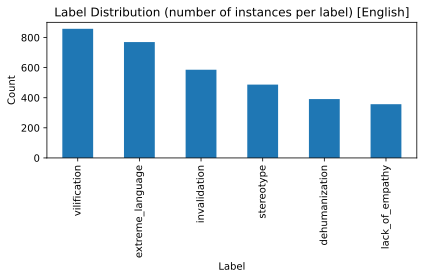

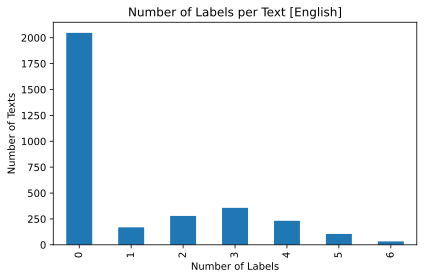

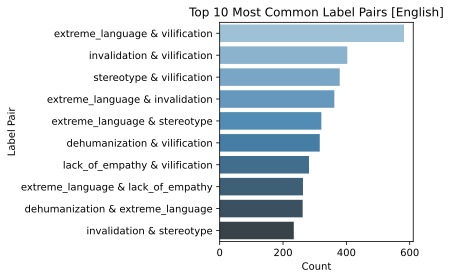

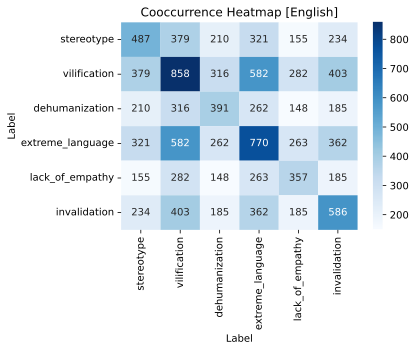

In [19]:
import itertools
import seaborn as sns

# List of label columns
label_cols = train_df_3.columns[2:]

# Prepare data for plotting
label_counts = train_df_3[label_cols].sum().sort_values(ascending=False)

num_labels_per_text = train_df_3[label_cols].sum(axis=1)
num_labels_value_counts = num_labels_per_text.value_counts().sort_index()

pair_counts = {}
for labels in train_df_3[label_cols].values:
    active = [label_cols[i] for i, v in enumerate(labels) if v]
    for pair in itertools.combinations(sorted(active), 2):
        pair_counts[pair] = pair_counts.get(pair, 0) + 1

pair_counts_sorted = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)
top_n = 10
top_pairs = pair_counts_sorted[:top_n]
pairs = [' & '.join(pair) for pair, _ in top_pairs]
counts = [count for _, count in top_pairs]

cooccurrence_matrix = np.zeros((len(label_cols), len(label_cols)), dtype=int)
for labels in train_df_3[label_cols].values:
    active_idx = [i for i, v in enumerate(labels) if v]
    for i in active_idx:
        for j in active_idx:
            cooccurrence_matrix[i, j] += 1

import os
os.makedirs("figures/eng", exist_ok=True)


# 1. Label distribution (bar chart)
plt.figure(figsize=(6, 4))
ax = label_counts.plot(kind='bar')
plt.title(f"Label Distribution (number of instances per label) [{language}]")
plt.ylabel("Count")
plt.xlabel("Label")
plt.tight_layout()
plt.savefig("figures/eng/subtask3_label_distribution.pdf")
plt.show()

# 2. Number of labels per text
plt.figure(figsize=(6, 4))
ax2 = num_labels_value_counts.plot(kind='bar')
plt.title(f"Number of Labels per Text [{language}]")
plt.xlabel("Number of Labels")
plt.ylabel("Number of Texts")
plt.tight_layout()
plt.savefig("figures/eng/subtask3_num_labels_per_text.pdf")
plt.show()

# 3. Most common label pairs (sorted)
plt.figure(figsize=(6, 4))
ax3 = sns.barplot(x=counts, y=pairs, hue=pairs, palette="Blues_d", legend=False)
plt.title(f"Top 10 Most Common Label Pairs [{language}]")
plt.xlabel("Count")
plt.ylabel("Label Pair")
plt.tight_layout()
plt.savefig("figures/eng/subtask3_top10_label_pairs.pdf")
plt.show()

# 4. Cooccurrence heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    cooccurrence_matrix,
    xticklabels=label_cols,
    yticklabels=label_cols,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title(f"Cooccurrence Heatmap [{language}]")
plt.xlabel("Label")
plt.ylabel("Label")
plt.tight_layout()
plt.savefig("figures/eng/subtask3_cooccurrence_heatmap.pdf")
plt.show()

# Correlation Heatmap

Loaded amh: 3332 samples from subtask2, 3332 samples from subtask3
Loaded arb: 3380 samples from subtask2, 3380 samples from subtask3
Loaded deu: 3180 samples from subtask2, 3180 samples from subtask3
Loaded eng: 3222 samples from subtask2, 3222 samples from subtask3
Loaded fas: 3295 samples from subtask2, 3295 samples from subtask3
Loaded hau: 3651 samples from subtask2, 3651 samples from subtask3
Loaded hin: 2744 samples from subtask2, 2744 samples from subtask3
Loaded nep: 2005 samples from subtask2, 2005 samples from subtask3
Loaded spa: 3305 samples from subtask2, 3305 samples from subtask3
Loaded tur: 2364 samples from subtask2, 2364 samples from subtask3
Loaded urd: 3563 samples from subtask2, 3563 samples from subtask3
Loaded zho: 4280 samples from subtask2, 4280 samples from subtask3

Total samples - Subtask2: 38321, Subtask3: 38321
Merged samples: 38321

Correlation Matrix:
                 Stereotype  Vilification  Dehumanization  Extreme\nLanguage  \
Political             0

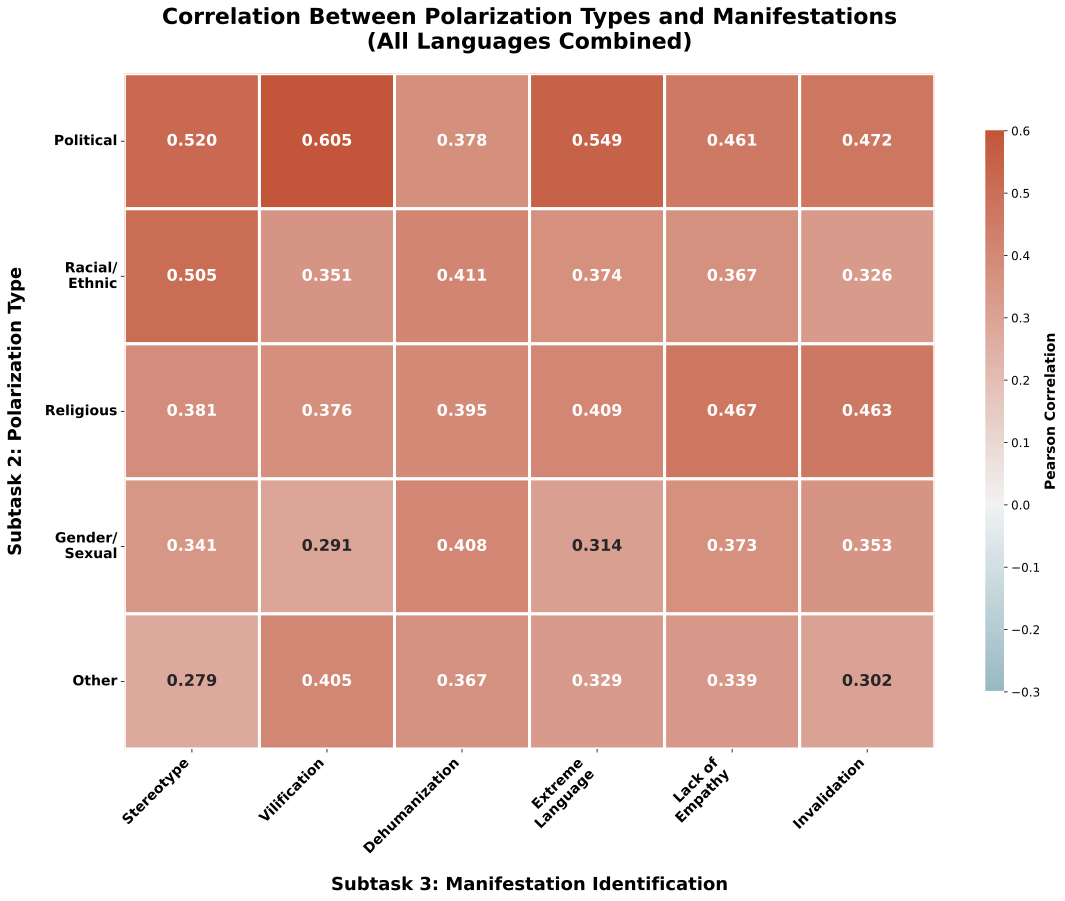


KEY FINDINGS:

Top 10 Strongest Correlations:
  1. Political ↔ Vilification: 0.605
  2. Political ↔ ExtremeLanguage: 0.549
  3. Political ↔ Stereotype: 0.520
  4. Racial/Ethnic ↔ Stereotype: 0.505
  5. Political ↔ Invalidation: 0.472
  6. Religious ↔ Lack ofEmpathy: 0.467
  7. Religious ↔ Invalidation: 0.463
  8. Political ↔ Lack ofEmpathy: 0.461
  9. Racial/Ethnic ↔ Dehumanization: 0.411
  10. Religious ↔ ExtremeLanguage: 0.409

Top 3 Highest Correlations:
  1. Political ↔ Vilification: 0.605
  2. Political ↔ ExtremeLanguage: 0.549
  3. Political ↔ Stereotype: 0.520


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Set up paths
base_path = Path("/Users/0ssamaak0/Documents/NLP/SemEval/dev_phase")
subtask2_train = base_path / "subtask2" / "train"
subtask3_train = base_path / "subtask3" / "train"

# Languages available in both subtasks (subtask3 excludes Italian and Russian)
common_languages = [
    "amh",
    "arb",
    "deu",
    "eng",
    "fas",
    "hau",
    "hin",
    "nep",
    "spa",
    "tur",
    "urd",
    "zho",
]

# Load and combine all data
subtask2_dfs = []
subtask3_dfs = []

for lang in common_languages:
    file2 = subtask2_train / f"{lang}.csv"
    file3 = subtask3_train / f"{lang}.csv"

    if file2.exists() and file3.exists():
        df2 = pd.read_csv(file2)
        df3 = pd.read_csv(file3)
        subtask2_dfs.append(df2)
        subtask3_dfs.append(df3)
        print(
            f"Loaded {lang}: {len(df2)} samples from subtask2, {len(df3)} samples from subtask3"
        )

# Combine all dataframes
df_subtask2 = pd.concat(subtask2_dfs, ignore_index=True)
df_subtask3 = pd.concat(subtask3_dfs, ignore_index=True)

print(f"\nTotal samples - Subtask2: {len(df_subtask2)}, Subtask3: {len(df_subtask3)}")

# Merge on id
df_merged = df_subtask2.merge(df_subtask3, on="id", suffixes=("_st2", "_st3"))
print(f"Merged samples: {len(df_merged)}")

# Define the columns for each subtask
subtask2_cols = ["political", "racial/ethnic", "religious", "gender/sexual", "other"]
subtask3_cols = [
    "stereotype",
    "vilification",
    "dehumanization",
    "extreme_language",
    "lack_of_empathy",
    "invalidation",
]

# Create the correlation matrix between subtask2 and subtask3 labels
correlation_matrix = np.zeros((len(subtask2_cols), len(subtask3_cols)))

for i, col2 in enumerate(subtask2_cols):
    for j, col3 in enumerate(subtask3_cols):
        correlation_matrix[i, j] = df_merged[col2].corr(df_merged[col3])

# Create a DataFrame for the heatmap
correlation_df = pd.DataFrame(
    correlation_matrix,
    index=[col.replace("_", " ").replace("/", "/\n").title() for col in subtask2_cols],
    columns=[col.replace("_", " ").title() for col in subtask3_cols],
)

# Pretty names for display
subtask2_labels = [
    "Political",
    "Racial/\nEthnic",
    "Religious",
    "Gender/\nSexual",
    "Other",
]
subtask3_labels = [
    "Stereotype",
    "Vilification",
    "Dehumanization",
    "Extreme\nLanguage",
    "Lack of\nEmpathy",
    "Invalidation",
]

correlation_df = pd.DataFrame(
    correlation_matrix, index=subtask2_labels, columns=subtask3_labels
)

print("\nCorrelation Matrix:")
print(correlation_df.round(3))

# Create a big, beautiful heatmap
plt.style.use("default")
fig, ax = plt.subplots(figsize=(16, 12))

# Custom colormap - diverging from deep blue to white to deep red
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create heatmap
heatmap = sns.heatmap(
    correlation_df,
    annot=True,
    fmt=".3f",
    cmap=cmap,
    center=0,
    vmin=-0.3,
    vmax=0.6,
    linewidths=3,
    linecolor="white",
    square=True,
    cbar_kws={"label": "Pearson Correlation", "shrink": 0.8, "aspect": 30},
    annot_kws={"fontsize": 16, "fontweight": "bold"},
    ax=ax,
)

# Styling
ax.set_xlabel(
    "Subtask 3: Manifestation Identification",
    fontsize=18,
    fontweight="bold",
    labelpad=20,
)
ax.set_ylabel(
    "Subtask 2: Polarization Type", fontsize=18, fontweight="bold", labelpad=20
)
ax.set_title(
    "Correlation Between Polarization Types and Manifestations\n(All Languages Combined)",
    fontsize=22,
    fontweight="bold",
    pad=25,
)

# Adjust tick labels
ax.set_xticklabels(
    ax.get_xticklabels(), fontsize=14, fontweight="semibold", rotation=45, ha="right"
)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, fontweight="semibold", rotation=0)

# Color bar adjustments
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.ax.set_ylabel("Pearson Correlation", fontsize=14, fontweight="bold")

plt.tight_layout()

# Save the figure
output_path = "/Users/0ssamaak0/Documents/NLP/SemEval/EDA/figures/correlation_subtask2_subtask3.pdf"
plt.savefig(output_path, dpi=300, bbox_inches="tight", facecolor="white")
print(f"\nSaved heatmap to: {output_path}")

# Also save as PNG for easier viewing
output_png = "/Users/0ssamaak0/Documents/NLP/SemEval/EDA/figures/correlation_subtask2_subtask3.png"
plt.savefig(output_png, dpi=300, bbox_inches="tight", facecolor="white")
print(f"Saved heatmap to: {output_png}")

plt.show()

# Additional statistics
print("\n" + "=" * 60)
print("KEY FINDINGS:")
print("=" * 60)

# Find strongest correlations
flat_corr = []
for i, col2 in enumerate(subtask2_labels):
    for j, col3 in enumerate(subtask3_labels):
        flat_corr.append(
            (col2.replace("\n", ""), col3.replace("\n", ""), correlation_matrix[i, j])
        )

flat_corr.sort(key=lambda x: abs(x[2]), reverse=True)

print("\nTop 10 Strongest Correlations:")
for i, (type_label, manif_label, corr) in enumerate(flat_corr[:10], 1):
    print(f"  {i}. {type_label} ↔ {manif_label}: {corr:.3f}")

# Print the highest 3 correlations (by absolute value)
print("\nTop 3 Highest Correlations:")
for i, (type_label, manif_label, corr) in enumerate(flat_corr[:3], 1):
    print(f"  {i}. {type_label} ↔ {manif_label}: {corr:.3f}")

